In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("Datasets/Attrition_dataset.csv")

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmployeeID           49653 non-null  int64 
 1   recorddate_key       49653 non-null  object
 2   birthdate_key        49653 non-null  object
 3   orighiredate_key     49653 non-null  object
 4   terminationdate_key  49653 non-null  object
 5   age                  49653 non-null  int64 
 6   length_of_service    49653 non-null  int64 
 7   city_name            49653 non-null  object
 8   department_name      49653 non-null  object
 9   job_title            49653 non-null  object
 10  store_name           49653 non-null  int64 
 11  gender_short         49653 non-null  object
 12  gender_full          49653 non-null  object
 13  termreason_desc      49653 non-null  object
 14  termtype_desc        49653 non-null  object
 15  STATUS_YEAR          49653 non-null  int64 
 16  STAT

In [5]:
df.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [6]:
df.duplicated().any()

False

In [7]:
#data cleaning

In [8]:
df.duplicated(subset='EmployeeID').any()

True

In [9]:
df=df.drop_duplicates(subset='EmployeeID',keep='last').reset_index(drop=True)

In [10]:
df

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2015 0:00,1/3/1954,8/28/1989,1/1/1900,61,26,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
1,1319,12/31/2015 0:00,1/3/1957,8/28/1989,1/1/1900,58,26,Vancouver,Executive,VP Stores,35,F,Female,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
2,1320,12/31/2015 0:00,1/2/1955,8/28/1989,1/1/1900,60,26,Vancouver,Executive,Legal Counsel,35,F,Female,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
3,1321,12/31/2015 0:00,1/2/1959,8/28/1989,1/1/1900,56,26,Vancouver,Executive,VP Human Resources,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
4,1322,12/31/2015 0:00,1/9/1958,8/31/1989,1/1/1900,57,26,Vancouver,Executive,VP Finance,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6279,8258,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21,2,Valemount,Dairy,Dairy Person,34,M,Male,Layoff,Involuntary,2015,TERMINATED,STORES
6280,8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
6281,8279,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21,2,White Rock,Customer Service,Cashier,39,F,Female,Layoff,Involuntary,2015,TERMINATED,STORES
6282,8296,12/1/2013 0:00,9/2/1994,10/9/2013,12/31/2013,19,0,Kelowna,Customer Service,Cashier,16,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES


In [11]:
df.columns

Index(['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
       'terminationdate_key', 'age', 'length_of_service', 'city_name',
       'department_name', 'job_title', 'store_name', 'gender_short',
       'gender_full', 'termreason_desc', 'termtype_desc', 'STATUS_YEAR',
       'STATUS', 'BUSINESS_UNIT'],
      dtype='object')

In [12]:
for col in df.columns[[1,2,3,4]]:
    df[col]=pd.to_datetime(df[col])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6284 entries, 0 to 6283
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   EmployeeID           6284 non-null   int64         
 1   recorddate_key       6284 non-null   datetime64[ns]
 2   birthdate_key        6284 non-null   datetime64[ns]
 3   orighiredate_key     6284 non-null   datetime64[ns]
 4   terminationdate_key  6284 non-null   datetime64[ns]
 5   age                  6284 non-null   int64         
 6   length_of_service    6284 non-null   int64         
 7   city_name            6284 non-null   object        
 8   department_name      6284 non-null   object        
 9   job_title            6284 non-null   object        
 10  store_name           6284 non-null   int64         
 11  gender_short         6284 non-null   object        
 12  gender_full          6284 non-null   object        
 13  termreason_desc      6284 non-nul

In [14]:
#data transformation

In [15]:
df['store_name'].unique()

array([35, 32, 18, 43, 29, 16, 26, 15,  8, 36, 38, 21, 44,  5, 25, 17, 28,
        1, 30,  2, 22, 31, 41,  6, 46, 40, 33, 12,  3, 19, 42, 37,  9,  7,
       13, 45, 39, 20, 11, 14, 34, 23, 24, 27, 10,  4], dtype=int64)

In [16]:
df=df.drop(columns=['store_name','gender_short'])

In [17]:
df

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,2015-12-31,1954-01-03,1989-08-28,1900-01-01,61,26,Vancouver,Executive,CEO,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
1,1319,2015-12-31,1957-01-03,1989-08-28,1900-01-01,58,26,Vancouver,Executive,VP Stores,Female,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
2,1320,2015-12-31,1955-01-02,1989-08-28,1900-01-01,60,26,Vancouver,Executive,Legal Counsel,Female,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
3,1321,2015-12-31,1959-01-02,1989-08-28,1900-01-01,56,26,Vancouver,Executive,VP Human Resources,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
4,1322,2015-12-31,1958-01-09,1989-08-31,1900-01-01,57,26,Vancouver,Executive,VP Finance,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6279,8258,2015-12-01,1994-05-28,2013-08-19,2015-12-30,21,2,Valemount,Dairy,Dairy Person,Male,Layoff,Involuntary,2015,TERMINATED,STORES
6280,8264,2013-08-01,1994-06-13,2013-08-27,2013-08-30,19,0,Vancouver,Customer Service,Cashier,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
6281,8279,2015-12-01,1994-07-18,2013-09-15,2015-12-30,21,2,White Rock,Customer Service,Cashier,Female,Layoff,Involuntary,2015,TERMINATED,STORES
6282,8296,2013-12-01,1994-09-02,2013-10-09,2013-12-31,19,0,Kelowna,Customer Service,Cashier,Female,Resignaton,Voluntary,2013,TERMINATED,STORES


In [18]:
df.columns

Index(['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
       'terminationdate_key', 'age', 'length_of_service', 'city_name',
       'department_name', 'job_title', 'gender_full', 'termreason_desc',
       'termtype_desc', 'STATUS_YEAR', 'STATUS', 'BUSINESS_UNIT'],
      dtype='object')

In [19]:
df.columns=['Eid','Record Date','DOB','Hire Date','Term Date','Age','Experience','City','Dname','Job','Gender','Term Reason','Term Type','Status Year','Status','Business Unit']

In [20]:
df

,Eid,Record Date,DOB,Hire Date,Term Date,Age,Experience,City,Dname,Job,Gender,Term Reason,Term Type,Status Year,Status,Business Unit
0,1318,2015-12-31,1954-01-03,1989-08-28,1900-01-01,61,26,Vancouver,Executive,CEO,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
1,1319,2015-12-31,1957-01-03,1989-08-28,1900-01-01,58,26,Vancouver,Executive,VP Stores,Female,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
2,1320,2015-12-31,1955-01-02,1989-08-28,1900-01-01,60,26,Vancouver,Executive,Legal Counsel,Female,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
3,1321,2015-12-31,1959-01-02,1989-08-28,1900-01-01,56,26,Vancouver,Executive,VP Human Resources,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
4,1322,2015-12-31,1958-01-09,1989-08-31,1900-01-01,57,26,Vancouver,Executive,VP Finance,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6279,8258,2015-12-01,1994-05-28,2013-08-19,2015-12-30,21,2,Valemount,Dairy,Dairy Person,Male,Layoff,Involuntary,2015,TERMINATED,STORES
6280,8264,2013-08-01,1994-06-13,2013-08-27,2013-08-30,19,0,Vancouver,Customer Service,Cashier,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
6281,8279,2015-12-01,1994-07-18,2013-09-15,2015-12-30,21,2,White Rock,Customer Service,Cashier,Female,Layoff,Involuntary,2015,TERMINATED,STORES
6282,8296,2013-12-01,1994-09-02,2013-10-09,2013-12-31,19,0,Kelowna,Customer Service,Cashier,Female,Resignaton,Voluntary,2013,TERMINATED,STORES


In [21]:
for col in ['Status','Business Unit']:
    df[col]=df[col].str.title()

In [22]:
df.head()

,Eid,Record Date,DOB,Hire Date,Term Date,Age,Experience,City,Dname,Job,Gender,Term Reason,Term Type,Status Year,Status,Business Unit
0,1318,2015-12-31,1954-01-03,1989-08-28,1900-01-01,61,26,Vancouver,Executive,CEO,Male,Not Applicable,Not Applicable,2015,Active,Headoffice
1,1319,2015-12-31,1957-01-03,1989-08-28,1900-01-01,58,26,Vancouver,Executive,VP Stores,Female,Not Applicable,Not Applicable,2015,Active,Headoffice
2,1320,2015-12-31,1955-01-02,1989-08-28,1900-01-01,60,26,Vancouver,Executive,Legal Counsel,Female,Not Applicable,Not Applicable,2015,Active,Headoffice
3,1321,2015-12-31,1959-01-02,1989-08-28,1900-01-01,56,26,Vancouver,Executive,VP Human Resources,Male,Not Applicable,Not Applicable,2015,Active,Headoffice
4,1322,2015-12-31,1958-01-09,1989-08-31,1900-01-01,57,26,Vancouver,Executive,VP Finance,Male,Not Applicable,Not Applicable,2015,Active,Headoffice


In [23]:
df.loc[df['Status']=='Active','Term Date'].unique()

<DatetimeArray>
['1900-01-01 00:00:00']
Length: 1, dtype: datetime64[ns]

In [24]:
df.loc[df['Status']=='Active','Record Date'].unique()


<DatetimeArray>
['2015-12-31 00:00:00']
Length: 1, dtype: datetime64[ns]

In [25]:
df['Record Date'].unique()

<DatetimeArray>
['2015-12-31 00:00:00', '2009-02-01 00:00:00', '2014-02-01 00:00:00',
 '2014-03-01 00:00:00', '2009-03-01 00:00:00', '2012-09-01 00:00:00',
 '2014-04-01 00:00:00', '2009-04-01 00:00:00', '2009-05-01 00:00:00',
 '2014-05-01 00:00:00',
 ...
 '2013-03-01 00:00:00', '2013-04-01 00:00:00', '2013-05-01 00:00:00',
 '2013-06-01 00:00:00', '2013-07-01 00:00:00', '2013-08-01 00:00:00',
 '2013-09-01 00:00:00', '2013-11-01 00:00:00', '2013-12-01 00:00:00',
 '2014-01-01 00:00:00']
Length: 121, dtype: datetime64[ns]

In [26]:
df.loc[df['Status']=='Active','Term Date']=df.loc[df['Status']=='Active','Record Date']

In [27]:
df.head()

,Eid,Record Date,DOB,Hire Date,Term Date,Age,Experience,City,Dname,Job,Gender,Term Reason,Term Type,Status Year,Status,Business Unit
0,1318,2015-12-31,1954-01-03,1989-08-28,2015-12-31,61,26,Vancouver,Executive,CEO,Male,Not Applicable,Not Applicable,2015,Active,Headoffice
1,1319,2015-12-31,1957-01-03,1989-08-28,2015-12-31,58,26,Vancouver,Executive,VP Stores,Female,Not Applicable,Not Applicable,2015,Active,Headoffice
2,1320,2015-12-31,1955-01-02,1989-08-28,2015-12-31,60,26,Vancouver,Executive,Legal Counsel,Female,Not Applicable,Not Applicable,2015,Active,Headoffice
3,1321,2015-12-31,1959-01-02,1989-08-28,2015-12-31,56,26,Vancouver,Executive,VP Human Resources,Male,Not Applicable,Not Applicable,2015,Active,Headoffice
4,1322,2015-12-31,1958-01-09,1989-08-31,2015-12-31,57,26,Vancouver,Executive,VP Finance,Male,Not Applicable,Not Applicable,2015,Active,Headoffice


In [28]:
temp=df['Dname'].unique()
print(temp)
temp[0]

['Executive' 'Store Management' 'Meats' 'Recruitment' 'Customer Service'
 'Produce' 'Bakery' 'Dairy' 'Processed Foods' 'Training' 'Labor Relations'
 'HR Technology' 'Employee Records' 'Compensation' 'Legal'
 'Accounts Receiveable' 'Information Technology' 'Accounts Payable'
 'Audit' 'Accounting' 'Investment']


'Executive'

In [29]:
df.loc[df['Dname']==temp[0],['Dname','Job','Business Unit']]

,Dname,Job,Business Unit
0,Executive,CEO,Headoffice
1,Executive,VP Stores,Headoffice
2,Executive,Legal Counsel,Headoffice
3,Executive,VP Human Resources,Headoffice
4,Executive,VP Finance,Headoffice
5,Executive,"Exec Assistant, VP Stores",Headoffice
6,Executive,"Exec Assistant, Legal Counsel",Headoffice
7,Executive,CHief Information Officer,Headoffice
11,Executive,"Exec Assistant, Human Resources",Headoffice
12,Executive,"Exec Assistant, Finance",Headoffice


In [30]:
def multi_val(row):
    if row['Job'].startswith('Exec Assistant,'):
        return row['Job'].removeprefix('Exec Assistant,').strip()
    else:
        return row['Job']
    
df['Job']=df.apply(multi_val,axis=1)

In [31]:
df.loc[df['Dname']==temp[0],['Dname','Job','Business Unit']]

,Dname,Job,Business Unit
0,Executive,CEO,Headoffice
1,Executive,VP Stores,Headoffice
2,Executive,Legal Counsel,Headoffice
3,Executive,VP Human Resources,Headoffice
4,Executive,VP Finance,Headoffice
5,Executive,VP Stores,Headoffice
6,Executive,Legal Counsel,Headoffice
7,Executive,CHief Information Officer,Headoffice
11,Executive,Human Resources,Headoffice
12,Executive,Finance,Headoffice


In [32]:
df.loc[df['Dname']==temp[1],['Dname','Job','Business Unit']]

,Dname,Job,Business Unit
8,Store Management,Store Manager,Stores
10,Store Management,Store Manager,Stores
32,Store Management,Store Manager,Stores
47,Store Management,Store Manager,Stores
4800,Store Management,Store Manager,Stores
4801,Store Management,Store Manager,Stores
4803,Store Management,Store Manager,Stores
4809,Store Management,Store Manager,Stores
4817,Store Management,Store Manager,Stores
4819,Store Management,Store Manager,Stores


In [33]:
def multi_val(row):
    if row['Job'].startswith('Exec Assistant,'):
        return row['Job'].removeprefix('Exec Assistant,').strip()
    elif row['Job'].startswith('Store'):
        return row['Job'].removeprefix('Store').strip()
    else:
        return row['Job']
    
df['Job']=df.apply(multi_val,axis=1)

In [34]:
df.loc[df['Dname']==temp[1],['Dname','Job','Business Unit']]


,Dname,Job,Business Unit
8,Store Management,Manager,Stores
10,Store Management,Manager,Stores
32,Store Management,Manager,Stores
47,Store Management,Manager,Stores
4800,Store Management,Manager,Stores
4801,Store Management,Manager,Stores
4803,Store Management,Manager,Stores
4809,Store Management,Manager,Stores
4817,Store Management,Manager,Stores
4819,Store Management,Manager,Stores


In [35]:
df.loc[df['Dname']==temp[2],['Dname','Job','Business Unit']]

,Dname,Job,Business Unit
9,Meats,Meats Manager,Stores
14,Meats,Meats Manager,Stores
15,Meats,Meats Manager,Stores
16,Meats,Meat Cutter,Stores
20,Meats,Meat Cutter,Stores
...,...,...,...
6065,Meats,Meat Cutter,Stores
6073,Meats,Meat Cutter,Stores
6081,Meats,Meat Cutter,Stores
6085,Meats,Meat Cutter,Stores


In [36]:
def multi_val(row):
    if row['Job'].startswith('Exec Assistant,'):
        return row['Job'].removeprefix('Exec Assistant,').strip()
    elif row['Job'].startswith('Store'):
        return row['Job'].removeprefix('Store').strip()
    elif row['Job'].startswith('Meats'):
        return row['Job'].removeprefix('Meats').strip()
    else:
        return row['Job']
    
df['Job']=df.apply(multi_val,axis=1)

In [37]:
df.loc[df['Dname']==temp[2],['Dname','Job','Business Unit']]


,Dname,Job,Business Unit
9,Meats,Manager,Stores
14,Meats,Manager,Stores
15,Meats,Manager,Stores
16,Meats,Meat Cutter,Stores
20,Meats,Meat Cutter,Stores
...,...,...,...
6065,Meats,Meat Cutter,Stores
6073,Meats,Meat Cutter,Stores
6081,Meats,Meat Cutter,Stores
6085,Meats,Meat Cutter,Stores


In [38]:
df.loc[df['Dname']==temp[2],'Job'].unique()

array(['Manager', 'Meat Cutter'], dtype=object)

In [39]:
df.loc[df['Dname']==temp[3],['Dname','Job','Business Unit']]


,Dname,Job,Business Unit
13,Recruitment,"Director, Recruitment",Headoffice
4826,Recruitment,Recruiter,Headoffice
4827,Recruitment,Recruiter,Headoffice
4828,Recruitment,Recruiter,Headoffice
4830,Recruitment,Recruiter,Headoffice
4834,Recruitment,Recruiter,Headoffice
4836,Recruitment,Recruiter,Headoffice
4838,Recruitment,Recruiter,Headoffice
4842,Recruitment,Recruiter,Headoffice


In [40]:
def multi_val(row):
    if row['Job'].startswith('Exec Assistant,'):
        return row['Job'].removeprefix('Exec Assistant,').strip()
    elif row['Job'].startswith('Store'):
        return row['Job'].removeprefix('Store').strip()
    elif row['Job'].startswith('Meats'):
        return row['Job'].removeprefix('Meats').strip()
    elif row['Job'].startswith('Director'):
        return 'Director'
    
    
    else:
        return row['Job']
    
df['Job']=df.apply(multi_val,axis=1)

In [41]:
df.loc[df['Dname']==temp[3],['Dname','Job','Business Unit']]


,Dname,Job,Business Unit
13,Recruitment,Director,Headoffice
4826,Recruitment,Recruiter,Headoffice
4827,Recruitment,Recruiter,Headoffice
4828,Recruitment,Recruiter,Headoffice
4830,Recruitment,Recruiter,Headoffice
4834,Recruitment,Recruiter,Headoffice
4836,Recruitment,Recruiter,Headoffice
4838,Recruitment,Recruiter,Headoffice
4842,Recruitment,Recruiter,Headoffice


In [42]:
df.loc[df['Dname']==temp[4],['Dname','Job','Business Unit']]


,Dname,Job,Business Unit
17,Customer Service,Customer Service Manager,Stores
30,Customer Service,Customer Service Manager,Stores
31,Customer Service,Customer Service Manager,Stores
54,Customer Service,Customer Service Manager,Stores
61,Customer Service,Customer Service Manager,Stores
...,...,...,...
6278,Customer Service,Cashier,Stores
6280,Customer Service,Cashier,Stores
6281,Customer Service,Cashier,Stores
6282,Customer Service,Cashier,Stores


In [43]:
def multi_val(row):
    if row['Job'].startswith('Exec Assistant,'):
        return row['Job'].removeprefix('Exec Assistant,').strip()
    
    elif row['Job'].endswith('Manager'):
        return 'Manger'
    
    elif row['Job'].startswith('Meats'):
        return row['Job'].removeprefix('Meats').strip()
    
    elif row['Job'].startswith('Director'):
        return 'Director'
    
    
    else:
        return row['Job']
    
df['Job']=df.apply(multi_val,axis=1)

In [44]:
df.loc[df['Dname']==temp[4],['Dname','Job','Business Unit']]


,Dname,Job,Business Unit
17,Customer Service,Manger,Stores
30,Customer Service,Manger,Stores
31,Customer Service,Manger,Stores
54,Customer Service,Manger,Stores
61,Customer Service,Manger,Stores
...,...,...,...
6278,Customer Service,Cashier,Stores
6280,Customer Service,Cashier,Stores
6281,Customer Service,Cashier,Stores
6282,Customer Service,Cashier,Stores


In [45]:
df.loc[df['Dname']==temp[5],['Dname','Job','Business Unit']]

,Dname,Job,Business Unit
18,Produce,Manger,Stores
19,Produce,Manger,Stores
38,Produce,Manger,Stores
45,Produce,Manger,Stores
57,Produce,Manger,Stores
...,...,...,...
5918,Produce,Produce Clerk,Stores
6021,Produce,Produce Clerk,Stores
6108,Produce,Produce Clerk,Stores
6112,Produce,Produce Clerk,Stores


In [46]:
def multi_val(row):
    if row['Job'].startswith('Exec Assistant,'):
        return row['Job'].removeprefix('Exec Assistant,').strip()
    
    elif row['Job'].endswith('Manager'):
        return 'Manger'
    
    elif row['Job'].endswith('Clerk'):
        return 'Clerk'
    
    elif row['Job'].startswith('Meats'):
        return row['Job'].removeprefix('Meats').strip()
    
    elif row['Job'].startswith('Director'):
        return 'Director'
    
    
    else:
        return row['Job']
    
df['Job']=df.apply(multi_val,axis=1)

In [47]:
df.loc[df['Dname']==temp[5],['Dname','Job','Business Unit']]


,Dname,Job,Business Unit
18,Produce,Manger,Stores
19,Produce,Manger,Stores
38,Produce,Manger,Stores
45,Produce,Manger,Stores
57,Produce,Manger,Stores
...,...,...,...
5918,Produce,Clerk,Stores
6021,Produce,Clerk,Stores
6108,Produce,Clerk,Stores
6112,Produce,Clerk,Stores


In [48]:
df.loc[df['Dname']==temp[10],['Dname','Job','Business Unit']]


,Dname,Job,Business Unit
4802,Labor Relations,Director,Headoffice
4871,Labor Relations,Labor Relations Analyst,Headoffice
4876,Labor Relations,Labor Relations Analyst,Headoffice
4877,Labor Relations,Labor Relations Analyst,Headoffice
4881,Labor Relations,Labor Relations Analyst,Headoffice
4883,Labor Relations,Labor Relations Analyst,Headoffice


In [49]:
df.loc[df['Dname']==temp[10],'Job'].unique()

array(['Director', 'Labor Relations Analyst'], dtype=object)

In [50]:
def multi_val(row):
    if row['Job'].startswith('Exec Assistant,'):
        return row['Job'].removeprefix('Exec Assistant,').strip()
    
    elif row['Job'].endswith('Manager'):
        return 'Manger'
    
    elif row['Job'].endswith('Clerk'):
        return 'Clerk'
        
    elif row['Job'].endswith('Analyst'):
        return 'Analyst'
    
            
    elif row['Job'].endswith('Admin'):
        return 'Admin'
    
    
    elif row['Job'].startswith('Meats'):
        return row['Job'].removeprefix('Meats').strip()
    
    elif row['Job'].startswith('Director'):
        return 'Director'
    
    
    
    else:
        return row['Job']
    
df['Job']=df.apply(multi_val,axis=1)

In [51]:
df.loc[df['Dname']==temp[12],'Job'].unique()

array(['Director', 'Admin'], dtype=object)

In [52]:
df.loc[df['Dname']==temp[12],['Dname','Job','Business Unit']]


,Dname,Job,Business Unit
4805,Employee Records,Director,Headoffice
4898,Employee Records,Admin,Headoffice
4900,Employee Records,Admin,Headoffice
4907,Employee Records,Admin,Headoffice
4908,Employee Records,Admin,Headoffice
4910,Employee Records,Admin,Headoffice


In [53]:
def multi_val(row):
    if row['Job'].startswith('Exec Assistant,'):
        return row['Job'].removeprefix('Exec Assistant,').strip()
    
    elif row['Job'].endswith('Manager'):
        return 'Manger'
    
    elif row['Job'].endswith('Clerk'):
        return 'Clerk'
        
    elif row['Job'].endswith('Analyst'):
        return 'Analyst'
    
            
    elif row['Job'].endswith('Admin'):
        return 'Admin'
    
    
    elif row['Job'].startswith('Meats'):
        return row['Job'].removeprefix('Meats').strip()
    
    elif row['Job'].startswith('Director'):
        return 'Director'
    
    
    
    else:
        return row['Job']
    
df['Job']=df.apply(multi_val,axis=1)

In [54]:
df.loc[df['Dname']==temp[18],'Job'].unique()

array(['Director', 'Auditor'], dtype=object)

In [55]:
df.loc[df['Dname']==temp[20],['Dname','Job','Business Unit']]


,Dname,Job,Business Unit
4824,Investment,Director,Headoffice
4969,Investment,Analyst,Headoffice
4970,Investment,Analyst,Headoffice
4971,Investment,Analyst,Headoffice


In [56]:
df['Job']=df['Job'].replace({'CHief Information Officer':'Chief Information Officer'})

In [57]:
df.loc[df['Experience']==0]

,Eid,Record Date,DOB,Hire Date,Term Date,Age,Experience,City,Dname,Job,Gender,Term Reason,Term Type,Status Year,Status,Business Unit
5917,6312,2006-02-01,1979-05-14,2005-09-09,2006-02-02,26,0,Grand Forks,Dairy,Dairy Person,Male,Resignaton,Voluntary,2006,Terminated,Stores
5941,6540,2006-12-01,1981-02-14,2006-08-13,2006-12-17,25,0,Victoria,Bakery,Baker,Male,Resignaton,Voluntary,2006,Terminated,Stores
5942,6561,2007-07-01,1981-04-13,2006-09-14,2007-07-17,26,0,Vancouver,Processed Foods,Shelf Stocker,Male,Resignaton,Voluntary,2007,Terminated,Stores
5944,6568,2007-02-01,1981-04-21,2006-09-18,2007-02-22,25,0,Nanaimo,Processed Foods,Shelf Stocker,Male,Resignaton,Voluntary,2007,Terminated,Stores
5949,6616,2007-10-01,1981-09-20,2006-12-07,2007-10-01,26,0,Vancouver,Processed Foods,Shelf Stocker,Male,Resignaton,Voluntary,2007,Terminated,Stores
5995,6789,2008-02-01,1983-03-14,2007-09-18,2008-02-14,24,0,Burnaby,Dairy,Dairy Person,Female,Resignaton,Voluntary,2008,Terminated,Stores
5998,6807,2008-05-01,1983-04-22,2007-10-09,2008-05-14,25,0,Vancouver,Customer Service,Cashier,Male,Resignaton,Voluntary,2008,Terminated,Stores
6023,6914,2008-07-01,1984-02-05,2008-03-09,2008-07-14,24,0,Kelowna,Processed Foods,Shelf Stocker,Male,Resignaton,Voluntary,2008,Terminated,Stores
6025,6918,2008-03-01,1984-02-06,2008-03-10,2008-03-13,24,0,Vancouver,Customer Service,Cashier,Male,Resignaton,Voluntary,2008,Terminated,Stores
6028,6937,2009-03-01,1984-03-26,2008-04-04,2009-03-22,25,0,Vancouver,Customer Service,Cashier,Female,Resignaton,Voluntary,2009,Terminated,Stores


In [58]:
df['Term Date']-df['Hire Date']

0      9621 days
1      9621 days
2      9621 days
3      9621 days
4      9618 days
          ...   
6279    863 days
6280      3 days
6281    836 days
6282     83 days
6283    401 days
Length: 6284, dtype: timedelta64[ns]

In [59]:
df['Experience']=(((df['Term Date']-df['Hire Date']).dt.days)/365).round(1)



In [60]:
df

,Eid,Record Date,DOB,Hire Date,Term Date,Age,Experience,City,Dname,Job,Gender,Term Reason,Term Type,Status Year,Status,Business Unit
0,1318,2015-12-31,1954-01-03,1989-08-28,2015-12-31,61,26.4,Vancouver,Executive,CEO,Male,Not Applicable,Not Applicable,2015,Active,Headoffice
1,1319,2015-12-31,1957-01-03,1989-08-28,2015-12-31,58,26.4,Vancouver,Executive,VP Stores,Female,Not Applicable,Not Applicable,2015,Active,Headoffice
2,1320,2015-12-31,1955-01-02,1989-08-28,2015-12-31,60,26.4,Vancouver,Executive,Legal Counsel,Female,Not Applicable,Not Applicable,2015,Active,Headoffice
3,1321,2015-12-31,1959-01-02,1989-08-28,2015-12-31,56,26.4,Vancouver,Executive,VP Human Resources,Male,Not Applicable,Not Applicable,2015,Active,Headoffice
4,1322,2015-12-31,1958-01-09,1989-08-31,2015-12-31,57,26.4,Vancouver,Executive,VP Finance,Male,Not Applicable,Not Applicable,2015,Active,Headoffice
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6279,8258,2015-12-01,1994-05-28,2013-08-19,2015-12-30,21,2.4,Valemount,Dairy,Dairy Person,Male,Layoff,Involuntary,2015,Terminated,Stores
6280,8264,2013-08-01,1994-06-13,2013-08-27,2013-08-30,19,0.0,Vancouver,Customer Service,Cashier,Female,Resignaton,Voluntary,2013,Terminated,Stores
6281,8279,2015-12-01,1994-07-18,2013-09-15,2015-12-30,21,2.3,White Rock,Customer Service,Cashier,Female,Layoff,Involuntary,2015,Terminated,Stores
6282,8296,2013-12-01,1994-09-02,2013-10-09,2013-12-31,19,0.2,Kelowna,Customer Service,Cashier,Female,Resignaton,Voluntary,2013,Terminated,Stores


In [61]:
df=df.set_index('Eid')
#if we have primary key we can remove index and consider primary key as only index

In [62]:
df

,Record Date,DOB,Hire Date,Term Date,Age,Experience,City,Dname,Job,Gender,Term Reason,Term Type,Status Year,Status,Business Unit
Eid,,,,,,,,,,,,,,,
1318,2015-12-31,1954-01-03,1989-08-28,2015-12-31,61,26.4,Vancouver,Executive,CEO,Male,Not Applicable,Not Applicable,2015,Active,Headoffice
1319,2015-12-31,1957-01-03,1989-08-28,2015-12-31,58,26.4,Vancouver,Executive,VP Stores,Female,Not Applicable,Not Applicable,2015,Active,Headoffice
1320,2015-12-31,1955-01-02,1989-08-28,2015-12-31,60,26.4,Vancouver,Executive,Legal Counsel,Female,Not Applicable,Not Applicable,2015,Active,Headoffice
1321,2015-12-31,1959-01-02,1989-08-28,2015-12-31,56,26.4,Vancouver,Executive,VP Human Resources,Male,Not Applicable,Not Applicable,2015,Active,Headoffice
1322,2015-12-31,1958-01-09,1989-08-31,2015-12-31,57,26.4,Vancouver,Executive,VP Finance,Male,Not Applicable,Not Applicable,2015,Active,Headoffice
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8258,2015-12-01,1994-05-28,2013-08-19,2015-12-30,21,2.4,Valemount,Dairy,Dairy Person,Male,Layoff,Involuntary,2015,Terminated,Stores
8264,2013-08-01,1994-06-13,2013-08-27,2013-08-30,19,0.0,Vancouver,Customer Service,Cashier,Female,Resignaton,Voluntary,2013,Terminated,Stores
8279,2015-12-01,1994-07-18,2013-09-15,2015-12-30,21,2.3,White Rock,Customer Service,Cashier,Female,Layoff,Involuntary,2015,Terminated,Stores


In [63]:
df[['Term Reason','Term Type']]=df[['Term Reason','Term Type']].replace({'Not Applicable':'NA'})

In [64]:
df

,Record Date,DOB,Hire Date,Term Date,Age,Experience,City,Dname,Job,Gender,Term Reason,Term Type,Status Year,Status,Business Unit
Eid,,,,,,,,,,,,,,,
1318,2015-12-31,1954-01-03,1989-08-28,2015-12-31,61,26.4,Vancouver,Executive,CEO,Male,NA,NA,2015,Active,Headoffice
1319,2015-12-31,1957-01-03,1989-08-28,2015-12-31,58,26.4,Vancouver,Executive,VP Stores,Female,NA,NA,2015,Active,Headoffice
1320,2015-12-31,1955-01-02,1989-08-28,2015-12-31,60,26.4,Vancouver,Executive,Legal Counsel,Female,NA,NA,2015,Active,Headoffice
1321,2015-12-31,1959-01-02,1989-08-28,2015-12-31,56,26.4,Vancouver,Executive,VP Human Resources,Male,NA,NA,2015,Active,Headoffice
1322,2015-12-31,1958-01-09,1989-08-31,2015-12-31,57,26.4,Vancouver,Executive,VP Finance,Male,NA,NA,2015,Active,Headoffice
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8258,2015-12-01,1994-05-28,2013-08-19,2015-12-30,21,2.4,Valemount,Dairy,Dairy Person,Male,Layoff,Involuntary,2015,Terminated,Stores
8264,2013-08-01,1994-06-13,2013-08-27,2013-08-30,19,0.0,Vancouver,Customer Service,Cashier,Female,Resignaton,Voluntary,2013,Terminated,Stores
8279,2015-12-01,1994-07-18,2013-09-15,2015-12-30,21,2.3,White Rock,Customer Service,Cashier,Female,Layoff,Involuntary,2015,Terminated,Stores


In [65]:
df.columns

Index(['Record Date', 'DOB', 'Hire Date', 'Term Date', 'Age', 'Experience',
       'City', 'Dname', 'Job', 'Gender', 'Term Reason', 'Term Type',
       'Status Year', 'Status', 'Business Unit'],
      dtype='object')

In [66]:
l=[ 'Status Year','Gender','Age','Experience','City','Dname','Job','Business Unit','Hire Date','Term Date','Term Reason','Term Type','Status']
#reinitalizing the colums and shuffling of column

In [67]:
df=df[l]

In [68]:
df

,Status Year,Gender,Age,Experience,City,Dname,Job,Business Unit,Hire Date,Term Date,Term Reason,Term Type,Status
Eid,,,,,,,,,,,,,
1318,2015,Male,61,26.4,Vancouver,Executive,CEO,Headoffice,1989-08-28,2015-12-31,NA,NA,Active
1319,2015,Female,58,26.4,Vancouver,Executive,VP Stores,Headoffice,1989-08-28,2015-12-31,NA,NA,Active
1320,2015,Female,60,26.4,Vancouver,Executive,Legal Counsel,Headoffice,1989-08-28,2015-12-31,NA,NA,Active
1321,2015,Male,56,26.4,Vancouver,Executive,VP Human Resources,Headoffice,1989-08-28,2015-12-31,NA,NA,Active
1322,2015,Male,57,26.4,Vancouver,Executive,VP Finance,Headoffice,1989-08-31,2015-12-31,NA,NA,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8258,2015,Male,21,2.4,Valemount,Dairy,Dairy Person,Stores,2013-08-19,2015-12-30,Layoff,Involuntary,Terminated
8264,2013,Female,19,0.0,Vancouver,Customer Service,Cashier,Stores,2013-08-27,2013-08-30,Resignaton,Voluntary,Terminated
8279,2015,Female,21,2.3,White Rock,Customer Service,Cashier,Stores,2013-09-15,2015-12-30,Layoff,Involuntary,Terminated


In [69]:
#data analyis:


In [70]:
df=df.sort_index()
#it sort the index

In [71]:
df.sort_index(ascending=False)

,Status Year,Gender,Age,Experience,City,Dname,Job,Business Unit,Hire Date,Term Date,Term Reason,Term Type,Status
Eid,,,,,,,,,,,,,
8336,2015,Male,21,2.1,Vancouver,Dairy,Dairy Person,Stores,2013-12-11,2015-12-31,NA,NA,Active
8335,2015,Female,21,2.1,Vancouver,Dairy,Dairy Person,Stores,2013-12-10,2015-12-31,NA,NA,Active
8334,2015,Female,21,2.1,West Vancouver,Customer Service,Cashier,Stores,2013-12-09,2015-12-31,NA,NA,Active
8333,2015,Male,21,2.1,Fort St John,Customer Service,Cashier,Stores,2013-12-05,2015-12-31,NA,NA,Active
8332,2015,Female,21,2.1,Langley,Customer Service,Cashier,Stores,2013-12-05,2015-12-31,NA,NA,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1322,2015,Male,57,26.4,Vancouver,Executive,VP Finance,Headoffice,1989-08-31,2015-12-31,NA,NA,Active
1321,2015,Male,56,26.4,Vancouver,Executive,VP Human Resources,Headoffice,1989-08-28,2015-12-31,NA,NA,Active
1320,2015,Female,60,26.4,Vancouver,Executive,Legal Counsel,Headoffice,1989-08-28,2015-12-31,NA,NA,Active


In [72]:
#question: year wise hiring count
hirings=(df['Hire Date'].dt.year).value_counts().sort_index()
hirings.head()

Hire Date
1989     86
1990    214
1991    200
1992    248
1993    298
Name: count, dtype: int64

In [73]:
#question : how many people left the company

Terminations=(df.loc[df['Status']=='Terminated','Term Date'].dt.year).value_counts().sort_index()
Terminations.head()

Term Date
2006    134
2007    162
2008    164
2009    142
2010    123
Name: count, dtype: int64

In [74]:
df1=pd.merge(hirings,Terminations,how='outer',left_index=True,right_index=True).fillna(0).astype(int)

In [75]:
df1.columns=['Hirings','Terminations']
df1

,Hirings,Terminations
1989,86,0
1990,214,0
1991,200,0
1992,248,0
1993,298,0
1994,298,0
1995,312,0
1996,273,0
1997,312,0
1998,341,0


In [76]:
df1['Year_Retention']=(df1['Hirings']-df1['Terminations'])

In [77]:
df1['Retention']=(df1['Hirings']-df1['Terminations']).cumsum()

In [78]:
df1

,Hirings,Terminations,Year_Retention,Retention
1989,86,0,86,86
1990,214,0,214,300
1991,200,0,200,500
1992,248,0,248,748
1993,298,0,298,1046
1994,298,0,298,1344
1995,312,0,312,1656
1996,273,0,273,1929
1997,312,0,312,2241
1998,341,0,341,2582


In [79]:
df.loc[df['Status']=='Active'].shape[0]

4799

In [80]:
#1. proportion of Active and Terminated Emps
((df['Status'].value_counts()/df.shape[0])*100).round(1).astype(str)+'%'

# df.shape[0] returns the total count

Status
Active        76.4%
Terminated    23.6%
Name: count, dtype: object

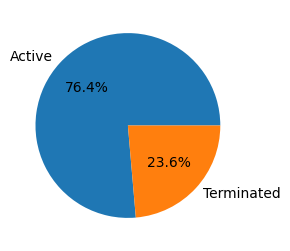

In [89]:
s=df['Status'].value_counts()
plt.figure(figsize=(3,3))
plt.pie(s.values,labels=s.index,autopct='%.1f%%')
plt.show()

In [81]:
#2. Gender wise no_of Active and Terminated Emps
df.groupby(['Gender','Status']).agg({'Status':'count'})

Status
Gender Status            
Female Active        2363
       Terminated     915
Male   Active        2436
       Terminated     570

In [82]:
df.groupby(['Gender','Status']).agg({'Status':'count'}).unstack()


Status           
Status Active Terminated
Gender                  
Female   2363        915
Male     2436        570

In [83]:
pd.pivot_table(df,index=['Gender'],columns=['Status'],values=['Status Year'],aggfunc='count')

Status Year           
Status      Active Terminated
Gender                       
Female        2363        915
Male          2436        570

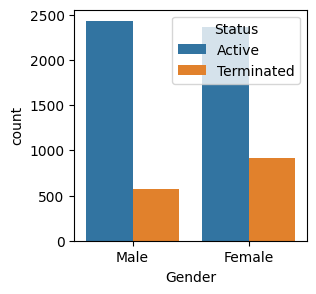

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(df,x='Gender',hue='Status')
plt.show()

In [97]:
df.columns

Index(['Status Year', 'Gender', 'Age', 'Experience', 'City', 'Dname', 'Job',
       'Business Unit', 'Hire Date', 'Term Date', 'Term Reason', 'Term Type',
       'Status'],
      dtype='object')

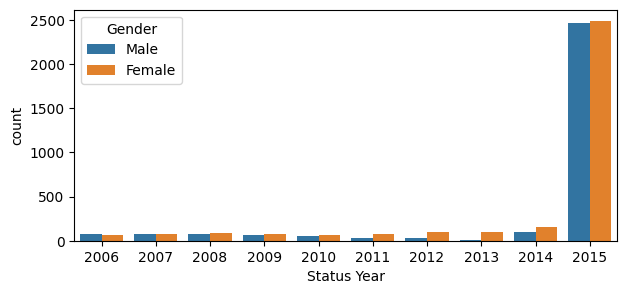

In [101]:
#check the company hired how many female and male employee
plt.figure(figsize=(7,3))
sns.countplot(df,x='Status Year',hue='Gender')
plt.show()

In [92]:
#3. Gneder and term reason wise no_of Active and Terminated Emps
df.groupby(['Gender','Status','Term Reason']).agg({'Status':'count'})

Status
Gender Status     Term Reason        
Female Active     NA             2363
       Terminated Layoff          113
                  Resignaton      211
                  Retirement      591
Male   Active     NA             2436
       Terminated Layoff          102
                  Resignaton      174
                  Retirement      294

In [94]:
df.groupby(['Gender','Status','Term Reason']).agg({'Status':'count'}).unstack()

Status                              
Term Reason       Layoff      NA Resignaton Retirement
Gender Status                                         
Female Active        NaN  2363.0        NaN        NaN
       Terminated  113.0     NaN      211.0      591.0
Male   Active        NaN  2436.0        NaN        NaN
       Terminated  102.0     NaN      174.0      294.0

In [88]:
#4.Average experience of Active and Terminated Emps
(df.groupby('Status').agg({'Experience':'mean'})).round(1)

,Experience
Status,
Active,13.8
Terminated,11.9


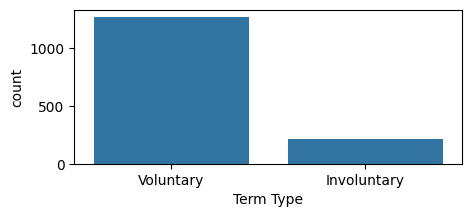

In [ ]:
#check what type of termination are high in this comapany dataset
t=df.loc[df['Status']=='Terminated']
plt.figure(figsize=(5,2))
sns.countplot(t,x='Term ')
plt.show()

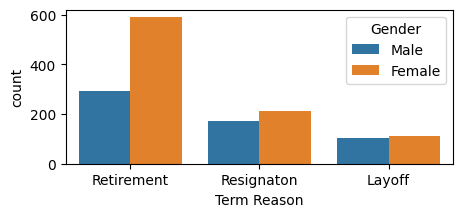

In [ ]:
# Gender wise Term Reason count 
t=df.loc[df['Status']=='Terminated']
plt.figure(figsize=(5,2))
sns.countplot(t,x='Term Reason',hue='Gender')
plt.show()

#observation:

#in all three category female employee  were terminated
#and most of female employee worked till there retiremnt time


In [112]:
df1

,Hirings,Terminations,Year_Retention,Retention
1989,86,0,86,86
1990,214,0,214,300
1991,200,0,200,500
1992,248,0,248,748
1993,298,0,298,1046
1994,298,0,298,1344
1995,312,0,312,1656
1996,273,0,273,1929
1997,312,0,312,2241
1998,341,0,341,2582


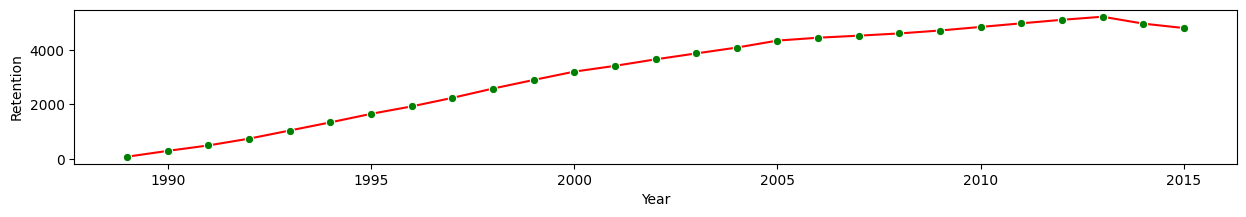

In [128]:
plt.figure(figsize=(15,2))
sns.lineplot(df1,x=df1.index,y='Retention',color='red',marker='o',markerfacecolor='green')
plt.xlabel('Year')
plt.show()

# v-trigale
# 0-circle

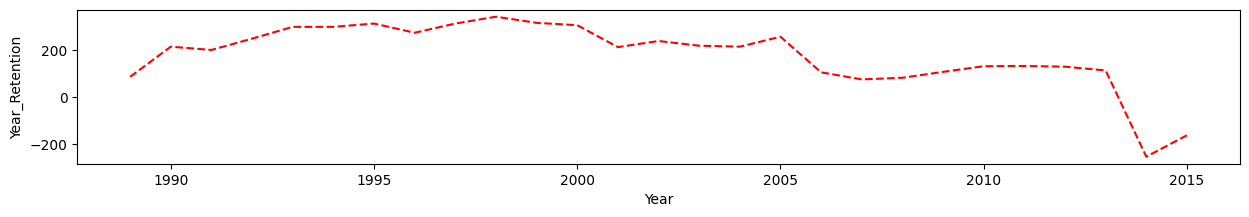

In [ ]:
plt.figure(figsize=(15,2))
sns.lineplot(df1,x=df1.index,y='Year_Retention',color='red',linestyle='dashed','dotted')
plt.xlabel('Year')
plt.show()

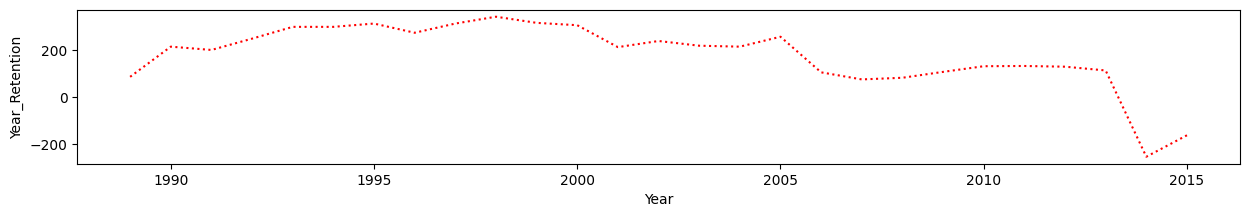

In [134]:
plt.figure(figsize=(15,2))
sns.lineplot(df1,x=df1.index,y='Year_Retention',color='red',linestyle='dotted')
plt.xlabel('Year')
plt.show()

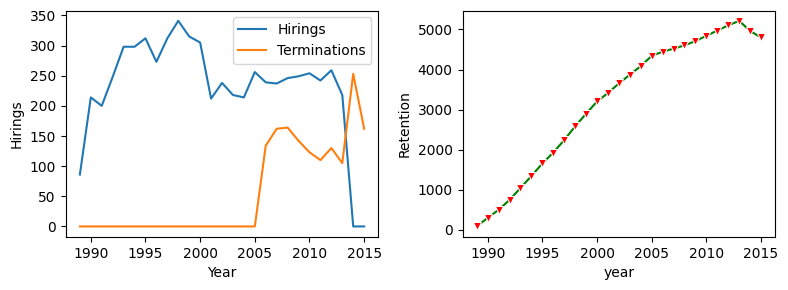

In [145]:
fig,axes=plt.subplots(ncols=2,figsize=(8,3))

sns.lineplot(df1,x=df1.index,y='Hirings',ax=axes[0],label='Hirings')
sns.lineplot(df1,x=df1.index,y='Terminations',ax=axes[0],label='Terminations')


sns.lineplot(df1,x=df1.index,y='Retention',color='green',marker='v',markerfacecolor='red',ax=axes[1])


axes[0].set_xlabel('Year')
axes[1].set_xlabel('year')

plt.tight_layout()
plt.show()